<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#A-general-work-flow-for-any-project-where-you-deal-with-data" data-toc-modified-id="A-general-work-flow-for-any-project-where-you-deal-with-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>A general work flow for any project where you deal with data</a></span></li><li><span><a href="#Box-plots:-using-the-Ammonia-case-study" data-toc-modified-id="Box-plots:-using-the-Ammonia-case-study-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Box plots: using the Ammonia case study</a></span></li><li><span><a href="#Bar-plots" data-toc-modified-id="Bar-plots-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Bar plots</a></span></li><li><span><a href="#Bar-plot-theory-(can-be-skipped-initially)" data-toc-modified-id="Bar-plot-theory-(can-be-skipped-initially)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Bar plot theory (can be skipped initially)</a></span></li><li><span><a href="#Histograms" data-toc-modified-id="Histograms-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Histograms</a></span></li></ul></div>

> All content here is under a Creative Commons Attribution [CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/) and all source code is released under a [BSD-2 clause license](https://en.wikipedia.org/wiki/BSD_licenses). 
>
>Please reuse, remix, revise, and [reshare this content](https://github.com/kgdunn/python-basic-notebooks) in any way, keeping this notice.

# Module 9: Overview 

In the prior [module 8](https://yint.org/pybasic08) you got more exposure to Pandas data frames.

In this module we use these data frames for getting a brief exposure to **statistics** and **plotting**. We can look at each topic separately, but they go hand-in-hand. You've probably heard: "*always start your data analysis by plotting your data*". There's a good reason for that: the type of statistical analysis is certainly guided by what is in that data. Plotting the data is one of the most effective ways to figure that out.


### Preparing for this module###

You should have read [Chapter 1](https://learnche.org/pid/data-visualization/) of the book "Process Improvement using Data".

### Cloning this notebook for yourself

If you are seeing a read-only version of this notebook, it is best you clone this notebook to your hard drive and work in it directly. <img src="images/general/Crystal_Clear_action_db_commit.png" style="width: 100px ; float:right"/> Check our this repo using Git. Use your favourite Git user-interface, or at the command line:

>```
>git clone git@github.com:kgdunn/python-basic-notebooks.git
>
># If you already have the repo cloned:
>git pull
>```

to update it to the later version.

### Summarizing data visually and numerically (statistics)

In [this notebook](https://yint.org/pybasic09):
 
1. Box plots
2. Bar plots (bar charts) 
3. Histograms
<hr>

In the [next notebook](https://yint.org/pybasic10):
4. Data tables
5. Time-series, or a sequence plot
6. Scatter plot

<img src="images/general/Crystal_Clear_app_korganizer.png" style="width: 100px ; float:left"/><br>
Statistical concepts are indicated with this icon. <br> In between, throughout the notes, we will also introduce statistical and data science concepts. This way you will learn how to interpret the plots and also communicate your results with the correct language.



## A general work flow for any project where you deal with data

*** After years of experience, and working with data you will find your own approach. ***

Here is my 6-step approach (not linear, but iterative): **Define**, **Get**, **Explore**, **Clean**, **Manipulate**, **Communicate**

1. **Define**/clarify the *objective*. Write down exactly what you need to deliver to have the project/assignment considered as completed.

 Then your next steps become clear.
 
2. Look for and **get** your data (or it will be given to you by a colleague). Since you have your objective clarified, it is clearer now which data, and how much data you need.

3. Then start looking at the data. Are the data what we expect? This is the **explore** step. Use plots and table summaries.

4. **Clean** up your data. This step and the prior step are iterative. As you explore your data you notice problems, bad data, you ask questions, you gain a bit of insight into the data. You clean, and re-explore, but always with the goal(s) in mind. Or perhaps you realize already this isn't the right data to reach your objective. You need other data, so you iterate.

5. Modifying, making calculations from, and **manipulate** the data. This step is also called modeling, if you are building models, but sometimes you are simply summarizing your data to get the objective solved.

6. From the data models and summaries and plots you start extracting the insights and conclusions you were looking for. Again, you can go back to any of the prior steps if you realize you need that to better achieve your goal(s). You **communicate** clear visualizations to your colleagues, with crisp, short text explanations that meet the objectives.

___

The above work flow (also called a '*pipeline*') is not new or unique to this course. Other people have written about similar approaches:

* Garrett Grolemund and Hadley Wickham in their book on <a href="http://r4ds.had.co.nz/index.html" target="_blank">R for Data Science</a> have this diagram (from <a href="http://r4ds.had.co.nz/explore-intro.html" target="_blank">this part</a> of their book). It matches the above, with slightly different names for the steps. It misses, in my opinion, the most important step of ***defining your goal*** first.
<img src="images/general/data-science-explore--Wickham-and-Grolemund-book.png">

___
* Hilary Mason and Chris Wiggins in their article on <a href="http://www.dataists.com/2010/09/a-taxonomy-of-data-science/" target="_blank">A Taxonomy of Data Science</a> describe their 5 steps in detail:
 1. **Obtain**: pointing and clicking does not scale. In other words, pointing and clicking in Excel, Minitab, or similar software is OK for small data/quick analysis, but does not scale to large data, nor repeated data analysis.
 2. **Scrub**: the world is a messy place
 3. **Explore**: you can see a lot by looking
 4. **Models**: always bad, sometimes ugly
 5. **Interpret**: "the purpose of computing is insight, not numbers."
 
 You can read their article, as well as <a href="https://towardsdatascience.com/a-beginners-guide-to-the-data-science-pipeline-a4904b2d8ad3" target="_blank">this view on it</a>, which is bit more lighthearted.
 
___

What has been your approach so far?

## Box plots: using the Ammonia case study

We will implement the 6-step workflow suggested above.


### Defining the problem (step 1)
Our end (1) **objective** is to describe what time-based trends we see in the ammonia concentration of a wastewater stream. We have a single measurement, taken every six hours. We will first see how we can summarize the data.

### Getting the data (step 2)

The next step is to (2) **get** the data. We have a data file from [this website](https://openmv.net/info/ammonia) where there is 1 column of numbers and several rows of ammonia measurements.

### Overview of remaining steps

Step 3 and 4 of exploring the data are often iterative and can happen interchangeably. We will (3) **explore** the data and see if our knowledge that ammonia concentrations should be in the range of 15 to 50 mmol/L is true. We might have to sometimes (4) **clean** up the data if there are problems.

We will also summarize the data by doing various calculations, also called (5) **manipulations**, and we will (6) **communicate** what we see with plots.

Let's get started. There are 3 ways to **get** the data:
1. Download the file to your computer
2. Read the file directly from the website (no proxy server)
3. Read the file directly from the website (you are behind a proxy server)

In [ ]:
# Loading the data from a local file
import os
import pandas as pd

# If the file is on your computer:
directory = r'C:\location\of\file'
data_file = 'ammonia.csv'              
full_filename = os.path.join(directory, data_file)
ammonia = pd.read_csv(full_filename)

In [ ]:
# Read the CSV file directly from a web server:
import pandas as pd
ammonia = pd.read_csv('http://openmv.net/file/ammonia.csv')

# If you are on a work computer behind a proxy server, you
# have to take a few more steps. Add these 6 lines of code.
import io
import requests
proxyDict = {"http" : "http://replace.with.proxy.address:port"}
url = "http://openmv.net/file/ammonia.csv"
s = requests.get(url, proxies=proxyDict).content
web_dataset = io.StringIO(s.decode('utf-8'))

# Convert the file fetched from the web to a Pandas dataframe
ammonia = pd.read_csv(web_dataset)

In [ ]:
# Show only the first few lines of the data table (by default it will show 5 lines)
print(ammonia.head())

# And the last 10:
print(ammonia.tail(n=10))

### Exploration (step 3)

Once we have opened the data we check with the ``.head(...)`` command if our data are within the expected range. At least the first few values. Similar for the ``.tail(...)`` values.

Those two commands are always good to check first.

Now we are ready to move on, to explore further with the ``.describe(...)`` command.

In [ ]:
# Run this single line of code, and answer the questions below
ammonia.describe()

##### Check your knowledge

1. There are \_\_\_\_\_\_ rows of data. Measured at 6 hours apart, this represents \_\_\_\_\_\_ days of sensor readings.
2. We expected ammonia concentrations to typically be in the range of 15 to 50 mmol/L. Is that the case from the description?
3. What is the average ammonia concentration?

### The median, or the 50th percentile

There are 1440 rows, or data points. If we sort these from low to high we will find the minimum as the first entry, and the maximum in the last position of the vector.

<img src="images/general/Crystal_Clear_app_korganizer.png" style="width: 100px ; float:right"/> What value will we find halfway? It is called the **median**, the middle value, the one that separates your data set in half. If there are an even number of data values, you take the average between the two middle values. 


Try find the median value manually:

In [ ]:
# Sort according to the values. In Pandas we have to be 
# explicit what to sort by (it could have been the index!)
ammonia_sorted = ammonia.sort_values(by='Ammonia')

# Verify that sorting happened
print(ammonia_sorted.head())
print(ammonia_sorted.tail())

# Notice the indexes are maintained. So you can see, for example, sample 811 and 812 (0-based) 
# were the lowest recorded ammonia values.

# Find the middle two values: 719 and 720, and calculate the average:
ammonia_sorted[719:721] # gets entry 719 and 720, which are the middle two values of the 1440 numbers

So there is the median: 36.18 mmol/L. And compared to the average, the mean of 36.094, they agree closely.

```python
# There is a quicker way to find the median. Does it match the manual value above?
ammonia.median()
```

Now, with that knowledge can you interpret what the row **"50%"** means in the above ``.describe()`` command?

<img src="images/general/Crystal_Clear_app_korganizer.png" style="width: 100px ; float:right"/>  The "50%" row in that description is called the 50th *percentile*. 
![alt=Pandas "describe" output](images/summarizing-data/ammonia-description.png)

It is the value in the dataset above which 50% of the values are found, and below which 50% of the values are found. A shortcut name that we use for the 50th percentile is **median**. It is the only percentile which has a special name. All the other's we just call by their number, e.g. we say "*the 75th percentile is 42.37*" for the Ammonia column.


##### Check your knowledge

1. What does the 25th percentile mean? Below the 25th percentile value we will find \_\_\_\_% of the values, and above the 25th percentile we find \_\_\_\_% of the values. In this case that means the 25th percentile will be close to value of the 360th entry in the sorted vector of data. Try it:

    ``ammonia_sorted[358:362]``

2. What does the 75th percentile mean? Below the 75th percentile value we will find \_\_\_\_% of the values, and above the 75th percentile we find \_\_\_\_% of the values. In this case that means the 75th percentile will be close to value of the 1080th entry in the sorted vector of data.  Try it:

    ``ammonia_sorted[1078:1082]``

3. So therefore: between the 25th percentile and the 75th percentile, we will find \_\_\_\_% of the values in our vector. 

4. Given this knowledge, does this match with the expectation we have that our Ammonia concentration values should lie between 15 to 50 mmol/L?

And there is the key reason why you are given the 25th and 75th percentile values. Half of the data in the sorted data vector lie between these two values. 25% of the data lie below the 25th percentile, and the other 25% lie above the 75th percentile, and the bulk of the data lie between these two values.

### Introducing the box plot

We have looked at the extremes with ``.head()`` and ``.tail()``, and we have learned about the mean and the median. 

What about the **typical** values? What do we even mean by _typical_ or _usual_ or _common_ values? Could we use the 25th and 75th percentiles to help guide us?

One way to get a feel for that is to plot these numbers: 25th, 50th and 75th percentiles. Let's see how, by using a **boxplot**.

In [ ]:
from matplotlib import pyplot
%matplotlib inline

# The plotting library needs access to the raw data values. Access those
# using the ``.values`` method
raw_values = ammonia.values
pyplot.boxplot(raw_values);

The boxplot gives you an idea of the distribution, the spread, of the data.

The key point is the orange center line, the line that splits the centre square (actually it is a rectangle, but it looks squarish). That horizontal line is the median.

It is surprising to see that middle chunk, that middle 50% of the sorted data values fall in such a narrow range of the rectangle.
![alt="Boxplot for the percentiles](images/summarizing-data/percentiles-ammonia.png)

<img src="images/general/Crystal_Clear_app_korganizer.png" style="width: 100px ; float:right"/>  The bottom 25% of the data falls below the box, and the top 25% of the data falls above the box. That is indicated to some extent by the whiskers, the lines leaving the middle square/rectangle shape. The whiskers tell how much spread there is in our data. We we see 2 single circles below the bottom whisker. These are likely *outliers*, data which are unusual, given the context of the rest of the data. More about *outliers* later.



In [ ]:
# Run this code to see that basic histogram.
# 1. Adjust the number of bins, and see how the histogram changes. The default number is 10.
# 2. Adjust the colour of the bin edges (borders). Try 'red', or 'black' or 'xkcd:pea soup'
pyplot.hist(raw_values, bins=30, edgecolor='white')
pyplot.xlabel('Ammonia concentration [mmol/L]');

Don't worry about the interpretation of this plot just yet. We have a separate section later which is all about histograms. You should see something like this:

<img src="images/summarizing-data/ammonia-histogram.png" alt="Ammonia dataset histogram" width="400px">

The key point is to get an idea of what the percentiles are. We will add these now on top of the histogram.

In [ ]:
# It is helpful to visualize the 25th and 75th percentiles on the histogram.

# Run the following code:
pyplot.hist(raw_values, bins=20, edgecolor='white');

# Now superimpose on the histogram the 25th and the 75th percentiles  (a type of quantile)
# as vertical lines (vlines) on the histogram
pyplot.vlines(x=ammonia.quantile(0.25), ymin=0, ymax=250, color="red")
pyplot.vlines(x=ammonia.quantile(0.50), ymin=0, ymax=250, color="orange")
pyplot.vlines(x=ammonia.quantile(0.75), ymin=0, ymax=250, color="red");

# NOTE: the 0.5 quantile, is the same as the 50th percentile, is the same as the median.
print('The 50th percentile is at: {}'.format(ammonia.quantile(0.5)))  

You should get something like this:

<img src="images/summarizing-data/ammonia-histogram-with-partitions.png" alt="Ammonia dataset histogram with 25, 50 and 75th percentiles" width="400px">

It might not appear like it is the case, but 
* 25% of the histogram area is to the left of the first red line
* 25% of the histogram area is between the red and the orange line
* 25% of the histogram area is between the orange line and the next red line to the right
* 25% of the histogram area is to the right of the second red line

All of that you can get from this single table. 
![alt=Pandas "describe" output](images/summarizing-data/ammonia-description.png)

Which brings us to two important points:
1. Tables **are** (despite what some people might say), a very effective form of summarizing data
2. Start your data analysis with the ``.describe()`` function to get a (tabular) feel for your data.


### Looking ahead

We have not solved our complete objective yet. Scroll up, and recall what we needed to do: "*describe what **time-based** trends we see in the ammonia concentration of a wastewater stream*". We will look at that in the [next notebook](https://yint.org/pybasic10).

### Summary

We have learned quite a bit in this section. See if you can explain these concepts to a friend/colleague:

* head and tail of a data set
* median
* spread in the data
* boxplot
* percentile

#### ➜ Challenge yourself: box plots for thickness of plastic sheets

Box plots on a single column are interesting, but they are even more interesting if you several variables. 

In this case we put the box plots side-by-side, from left-to-right. The variable on the y-axis is usually the same for all box plots. It doesn't make sense if the box plots being compared are of different measurements. For example: compare several temperature values, but it does not make sense if one box plot is temperature and the other is pressure.

In the data set at http://openmv.net/info/film-thickness we measure the thickness of a plastic sheet, also called a film. It is rectangular film, and measured in 4 positions. The data are from a confidential source, but are from a true process.

##### Answer these questions

1. At which position on the film seems to have the most outliers?
2. At which position do we have the least variability in the measurements?
3. At which position is the average thickness the lowest? [Use the median and the mean to make your judgment].

          TopRight      TopLeft  BottomRight   BottomLeft
count   160.000000   160.000000   160.000000   160.000000
mean    556.300000   578.162500   485.881250   562.987500
std     253.979864   345.012148   248.875038   345.173805
min      26.000000     0.000000     5.000000     9.000000
25%     387.250000   295.000000   316.500000   261.250000
50%     548.000000   548.000000   491.500000   557.000000
75%     687.250000   855.250000   643.500000   796.250000
max    1264.000000  1440.000000  1229.000000  1410.000000


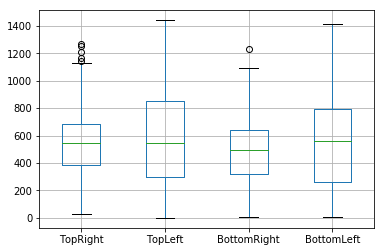

In [15]:
# Imports for reading the file and to plot it
import io
import requests
import pandas as pd
from matplotlib import pyplot
%matplotlib inline

url = 'http://openmv.net/file/film-thickness.csv'
proxyDict = {"http" : "http://replace.with.proxy.address:port"}
s = requests.get(url, proxies=proxyDict).content
web_dataset = io.StringIO(s.decode('utf-8'))

# Convert the file fetched from the web to a Pandas dataframe
data = pd.read_csv(web_dataset)
data = data.set_index('Number')
print(data.describe())
data.boxplot();

#### ➜ Challenge yourself: Judging the Judges

Many companies making food products have taste panels. In these panels a number of people judge the product based on different attributes. 

In the data set at https://openmv.net/info/peas we have multiple columns, but only six are scored by judges: flavour, sweetness, fruity flavour, off-flavour, mealiness and hardness. 

Remember in Pandas you can select columns using: ``df.loc[:, 'Flavour': 'Hardness']``, which will select all columns from `Flavour` up to, and including `Hardness`. 

##### Based on the box plot, answer these questions:

* What scale was used for the 6 attributes? Can we actually compare the values from the 6 attributes with each other?
* Which of the 6 attributes has the lowest variability?
* Which attribute has the most outliers?
* For which of the 6 attributes is the median most imbalanced (not half-way between the 25th and 75 percentile)?
* For that attribute, is the distribution shifted to the left, or to the right?

## Bar plots

Bar plots are a simple (though inefficient) way to visualize information. You don't need to explain them, almost everyone has seen one and knows how to read it. 

We will use the case study below to introduce the topic and point out some issues to be aware of.

### Website case study

We will follow the 6 steps from the [general data science workflow](#A-general-work-flow-for-any-project-where-you-deal-with-data) described above.

**Step 1** is to ***define*** your objective: we have recorded visits to a small website. Which day of the week is the most popular, and which is the least popular? 

**Step 2** is to get your data.

**Step 3** asks to explore your data, look at it and make summaries, get a feeling for what you have.

**Step 4** is to clean up your data. Thankfully this has been done already.

**Step 5** is use the data to solve your goal/objective, to manipulate the data.

**Step 6** is to communicate your results, which is what the main task is here, using a bar plot.


### Step 1:  Define your objective

We have a small website, and we record the number of visitors each data. Our ***objective*** is to find which day of the week is the most popular, and which is the least popular. 

Why? If we absolutely need to take the website off-line, we can pick a day which has minimal disruption for our visitors.

### Step 2: Get the data

The data has been assembled for you already. You can read more about the data, and download it from here: http://openmv.net/info/website-traffic 

Refer back to the module on [loading data from a CSV file](https://yint.org/pybasic07#Reading-a-CSV-file-with-Pandas), if needed. 

In [3]:
import pandas as pd
website = pd.read_csv('http://openmv.net/file/website-traffic.csv')
print(website.head())
print(website.tail())
website.describe()

# You will need to modify the above code if you are behind a proxy server.

   DayOfWeek MonthDay  Year  Visits
0     Monday   June 1  2009      27
1    Tuesday   June 2  2009      31
2  Wednesday   June 3  2009      38
3   Thursday   June 4  2009      38
4     Friday   June 5  2009      31
     DayOfWeek     MonthDay  Year  Visits
209     Sunday  December 27  2009      15
210     Monday  December 28  2009      24
211    Tuesday  December 29  2009      18
212  Wednesday  December 30  2009      10
213   Thursday  December 31  2009       7


,Year,Visits
count,214.0,214.000000
mean,2009.0,22.233645
std,0.0,8.331826
min,2009.0,3.000000
25%,2009.0,16.250000
50%,2009.0,22.000000
75%,2009.0,27.750000
max,2009.0,48.000000


### Step 3: explore your data

We have done a little bit of this step already, above, when we used the ``.describe()`` function.

So it seems like we have data from 1 June 2009 till 31 December 2009 here, sorted in order.

If you are paying attention, you will notice that the ``.head()`` command gives information about more columns than ``.describe()``. 

That is because, by default, ``.describe()`` will only describe numeric columns. To see a summary of all columns, use the following:

```python
website.describe(include='all')
```

and you should get this type of output:

<img src="images/summarizing-data/website-describe-summary.png" style="width: 400px ; float:right"/> 

We see that `DayOfWeek` has 7 unique values, which is expected.

`DayOfWeek` is not a quantitative (numeric) column. So we cannot calculate the average, the minimum, the maximum, etc, which is why those rows in the summary table are `NaN` (not a number).

Columns `Year` and ``Visits`` are however quantitative, so those averages, minimums, maximums, etc can be quantified.

<img src="images/general/Crystal_Clear_app_korganizer.png" style="width: 100px ; float:right"/> In contrast, `DayOfWeek` can be collected in groups (categories), and then we can count the number of data items in that group. For example, we could ask how many rows (in our dataset) are on "Monday". When we can can group rows into categories, we call it ``Categorical`` data.


Plenty of data you will work with are categorical. Some examples:
* *type of operating system*: Linux, Mac, Windows,...
* *colour eyes*: grey, blue, green, brown, ...
* *shape of object*: square, circular, rectangular, ...

##### Self-check:

* Name/describe some other examples of categorical data you have worked with recently.
* Which of these are categorical, and which are quantitative?

    * Number of years of education since high-school
    * Highest level of education achieved
    * 1st year student, 2nd year student, 3rd year student, ...
    * Relationship status
    * Fuel type used in cars
    * Octane number
    * Type of sweetener used: sugar, honey, stevia, maple syrup, ...
    
### Step 4: Clean up your data

We don't see any issues in the data yet. It actually was in a good condition already. In the next notebook we will show you can plot the number of visits against time, as a time-series plot. Perhaps there are issues that you will see then. 

For now we will assume the data are clean and that we can start to manipulate it.

### Step 5: manipulate your data, making calculations based on it 

To answer our question from step 1, we would like to summarize the average number of website visits, grouped per day.

In step 2 we saw that there is a column called `DayOfWeek`. In other words, we want to collect all visits from the same day together and calculate the average number of visits on that day.

If this were a table of results, we would want one column with 7 rows, one for each day of the week. In a second column we would want the average number of visitors on that day.

Luckily Pandas provides a function that does that for us: ``.groupby(...)``. It will group the data by a given categorical column.

```python
website.groupby(by='DayOfWeek')```

But once the rows have been grouped, you need to indicate what you want to do within those groups. Here are some examples:

```python
website.groupby(by='DayOfWeek').mean()   # calculate the average per group for the other columns
website.groupby(by='DayOfWeek').count()
website.groupby(by='DayOfWeek').max()    # once grouped, calculate the maximum per group
website.groupby(by='DayOfWeek').min()
```

In [4]:
from IPython.display import display

# Now we are ready to manipulate the data:
average_visits_per_day = website.groupby('DayOfWeek').mean()  
display(average_visits_per_day)

# The 'Year' column is not needed, and will cause problems 
# with our visualization. Since it is "2009" for all rows, 
# it also provides little value.
website = website.drop(columns='Year')
average_visits_per_day = average_visits_per_day.drop(columns='Year')
print('After removing the "Year" column there is only 1 column of data:')
display(average_visits_per_day)

,Year,Visits
DayOfWeek,,
Friday,2009.0,20.766667
Monday,2009.0,25.322581
Saturday,2009.0,15.266667
Sunday,2009.0,17.633333
Thursday,2009.0,23.709677
Tuesday,2009.0,25.774194
Wednesday,2009.0,26.741935


After removing the "Year" column there is only 1 column of data:


,Visits
DayOfWeek,
Friday,20.766667
Monday,25.322581
Saturday,15.266667
Sunday,17.633333
Thursday,23.709677
Tuesday,25.774194
Wednesday,26.741935


### Step 6: communicate your message clearly

A bar plot can be used to show these results graphically. Though, a table, as above, is perfectly valid, and actually meets the goals we set in step 1. We will come back to this point later.

```python
# Plot the data in a horizontal bar (barh)
average_visits_per_day.plot.barh(figsize=(15, 4));
```

The results are more clearly communicated with horizontal bars (use the ``barh`` command), than with vertical bars. Try using vertical bars, by modifying the above code and simply use ``.bar(...)``. Why is the ``barh`` command preferred?

##### Final checks
1. The most visits, *on average*, occur on a \_\_\_\_day.
2. If the website should go offline for an entire day for maintenance, the best day to pick would be a \_\_\_\_day.
3. Is the bar plot strictly necessary in this case study when compared to the data table? *In other words*, what value does the bar plot provide, if any, that is not provided by the table?




## Bar plot theory (can be skipped initially)


![alt="Bar plot terminology"](images/summarizing-data/barplot-example-expenses.png)

* A bar plot should be used when there are many categories.
* The category axis can be shown on the vertical axis. In this case we call it a horizontal bar chart (`barh`), since the bars are horizontal. It makes the chart labels more readable; but a "regular" bar plot with vertical bars (`bar`) and labels on the horizontal axis is also possible.
* The text can sometimes be added *inside the bar* if there is restricted space.
* An interesting characteristic of a bar plot is that **the *interpretation* of a bar plot does not differ if the category axis is reordered.** It can be easier to interpret the plot with a particular ordering; however, the interpretation won't be *different* if using a different ordering. The example below demonstrates this: the interpretation has not changed, but the visualization is far more effective.

### Definition of a bar plot

It seems strange to end off this section with a definition of a bar plot. But perhaps it isn't: you see these types of plots everywhere, especially in the media. But it is hard to describe what they actually are. Here's one definition:

> The bar plot is a univariate plot on a two-dimensional axis. The axes are not called x- or y-axes. Instead, one axis is called the ***category axis*** showing the category name, while the other, the ***value axis***, shows the value of each category as a bar.


### Enrichment

<img src="images/general/Crystal_Clear_app_korganizer.png" style="width: 100px ; float:right"/>

Bar plots are notorious for their use of excessive 'ink': using many pixels to show a small amount of 'data'. We should aim to maximize the data:ink ratio, which means high quantities of data are represented with as few pixels as possible. Bar plots do not do that, and so are not actually a suitable plot always. 

Read more [about barplots here](https://learnche.org/pid/data-visualization/bar-plots).


### Ordering the bars in the bar plot

The categories used in a bar plot can often be rearranged without 'breaking' the message.  We saw an example above.

This happened because each bar is independent of the others. If you re-order them, the information shown - bas on the length of the bars on the value axis - is still the same.

This does not mean you should show the bar plot in a random order. By ordering the information you make the plot easier to read, and in an underhanded way you subtly alter how the user reads the message. You can use this power to your advantage to make the message clearer, but you can also use it to frustrate your reader. Rather do the former, and not the latter.

In [ ]:
from matplotlib import pyplot
%matplotlib inline

fig = pyplot.figure(figsize=(15, 4));
pyplot.subplots_adjust(top=0.8, bottom=0.1, left=0.1, right=0.9, hspace=0.5, wspace=0.4);

# Left plot: subplot(1,2,1) means: create 1 row, with 2 columns, and draw in the 1st box
average_visits_per_day.plot.barh(ax=pyplot.subplot(1, 2, 1));

# Right plot: subplot(1,2,2) means: create 1 row, with 2 columns, and draw in the 2nd box
# Take the same grouped data from before, except sort it now:
sorted_data = average_visits_per_day.sort_values('Visits', ascending=False)  
sorted_data.plot.barh(ax=pyplot.subplot(1, 2, 2));

pyplot.suptitle(('Showing a bar plot with no ordering (left) and '
                 'with ordering (right).\n The message is clearer; '
                'and our objective is reached.'), fontsize=16);

![alt="Bar plot explanation"](images/summarizing-data/barplot-explanation.png)


The plot on the right helps make our objective clearer. Recall, it was "to find which day of the week is the most popular, and which is the least popular" for our website. 

The plot on the left can answer those questions, but the plot on the right is far more effective, and easier to read.

#### ➜ Challenge yourself: PCA plots

PCA (principal component analysis) models can be used to reduce multiple columns down to a smaller number. For example, summarize 10 columns of data with 2 columns. In this situation we say we have 2 components.

The purpose of this exercise is not to explain PCA, but rather to visualize how much variation is explained by component 1, component 2, *etc*.

Use this template code:
```python
from matplotlib import pyplot
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Get the subset of raw data
peas = pd.read_csv('https://openmv.net/file/peas.csv')
judges = peas.loc[:, 'Flavour': 'Hardness']

# Preprocess the raw data: center and scale it
scalar = StandardScaler(copy=True, with_mean=True, with_std=True)
scalar.fit(judges)
judges_centered_scaled = scalar.transform(judges)

# Fit a PCA model to the data, using 4 components
A = 4
pca = PCA(n_components = A)
pca.fit(judges_centered_scaled)  

# Prepare the plot.
x = components = list(range(1, A+1))
y = pca.explained_variance_ratio_
tick_labels = [int(i) for i in x]
pyplot.bar(x = ___,  y = ___, tick_label = ___)
```

##### Answer these questions:

1. Complete the code; how much variation is explained with 1 component, approximately, from the plot?
2. The variation explained is for each component. But change the code to show the *cumulative* variation explained by the components.
3. Again modify the code to skip the [preprocessing step](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). In other words, just fit the PCA model to the 6 columns without centering and scaling. What variation is now explained? ***Note***: what you see is here exceptional - normally preprocessing has a substantial effect on the fitting.

#### ➜ Challenge yourself: _____

Where a subplot is needed. Boxplot on the left, barplot on the right?

## Histograms

<img src="images/general/Crystal_Clear_app_korganizer.png" style="width: 100px ; float:right"/>

In this section we see how to create histograms, which are just another form of [bar plot](#Bar-plots) except the category axis is now numerical, instead of discrete categories. 

Like, bar plots, histograms are fairly simple to understand and you don't need to explain how to interpret them.  

Again, we will use a case study to introduce the topic.

Following the 6 data science steps of **Define**, **Get**, **Explore**, **Clean**, **Manipulate**, **Communicate**
we want to look at a data set where students were allowed unlimited time to write an exam. 

In a later notebook we will look at the goal to determine if students who took a longer time to finish actually scored a higher grade. For now, our objective is quite simple: visualize the distribution (spread) of the two variables:
1. the time to write the exam
2. the grade (out of 100) achieved on the exam

So the above is our (1) definition, and (2) we get the data from a website where this dataset has already been prepared for us (https://openmv.net/info/unlimited-time-test). We will (3) explore the data, and notice we don't really need to (4) clean it, since it has been done for us already. We will (5) manipulate the data into a histogram and visualize that to (6) communicate our goal: what does the spread of the data looks like.

### Step 1, 2 and 3: Define, Get and Explore

If you visit the [the website page](https://openmv.net/info/unlimited-time-test), you can right-click and download the CSV file to your computer. But, you can also directly import the file from the URL.

Use the `.describe()` function once you have loaded the data to get a summary description.

In [7]:
# Standard imports required to show plots and tables 
from matplotlib import pyplot
from IPython.display import display
%matplotlib inline
import pandas as pd
data = pd.read_csv('https://openmv.net/file/unlimited-time-test.csv')

# Add a single line of code below, using the .describe function
# to get a summary of the data

You should get a summary that looks like this: <img src="images/summarizing-data/grades-data-description.png" width="250px">

Note that it matches the data source, showing there are 80 rows (each row corresponds to a student). Answer these questions:

1. What was the average grade (out of 100) for this exam?
2. What was the shortest duration a student spent on the exam?
3. The student who wrote for the longest time wrote for ____ minutes.
4. The student with the lowest grade passed or failed the exam?
5. Does the median grade correspond closely with the average grade?
6. What else can you see in the description table that is interesting (*hint*: look at the 25 and 75th percentiles)

### Step 4 and 5: Clean and Manipulate

Step 4 is not needed (cleaning the data), but we will look at step 5 next, which is to manipulate the data to draw a histogram.

A histogram can be drawn directly in Matplotlib with the ``pyplot.hist(...)`` function, where the only input that is needed is a vector of data.

We want to get 2 histograms: one for the `Grade`s and another for the `Time` taken to write the exam.

You can extract each vector using Panda's ability to access the column from the table: ``data['Grade']`` and ``data['Time']`` will each return their respective columns.

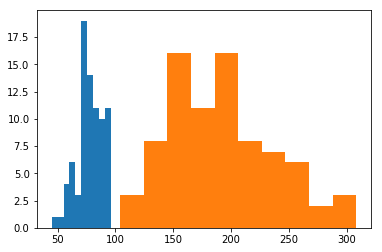

In [8]:
# Will plot both histograms in the same "axis" (graph)
pyplot.hist(data['Grade']);
pyplot.hist(data['Time']);

The above is very basic, but actually confusing. There is no x-axis label, and we are plotting two different things (grades and time) on the x-axis.

Let's clean this up and create two separate plots, side-by-side. Below you see the creation of what is called "subplots": multiple plots within the same figure.

The `pyplot.subplot(nrows, ncols, index)` command will create ``nrows`` rows of plots and ``ncols`` columns, and will draw in the ``index`` space. For example ``pyplot.subplot(2, 3, 1)`` will create 2 rows and 3 columns (there 6 subplots), and draw in the 1st subplot. Once you are done with that plot, you write ``pyplot.subplot(2, 3, 2)`` and it will go to the next subplot. 

Let's try this out:

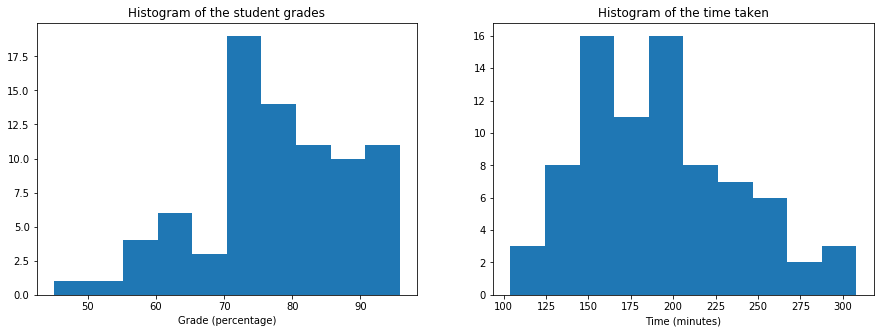

In [9]:
# We want our histograms in separate axes:
pyplot.figure(figsize=(15, 5))  # (width, height) = (15, 5)

# Start with the 1st plot:
pyplot.subplot(1, 2, 1)
pyplot.hist(data['Grade']);
pyplot.title('Histogram of the student grades')
pyplot.xlabel('Grade (percentage)')

# Then draw the second one
pyplot.subplot(1, 2, 2)
pyplot.hist(data['Time'])
pyplot.title('Histogram of the time taken')
pyplot.xlabel('Time (minutes)');

As you see, you get the same outputs as the graphs above, but now in two separate axes (1 "row" and 2 "columns" of graphs), each with their appropriate labels.

The histogram is calculated by dividing the range of the data (from low to high) into a certain number of bins, or sub-ranges. The bin ranges are equally spaced. For each bin we count the number of data points that lie in that sub-range. For example, there seem to be 3 students that spent between 100 and 125 minutes to write the exam.

We can change the number of bins, and this alters the shape of the histogram. We also add another parameter, ``edgecolor``, which improves the readability.

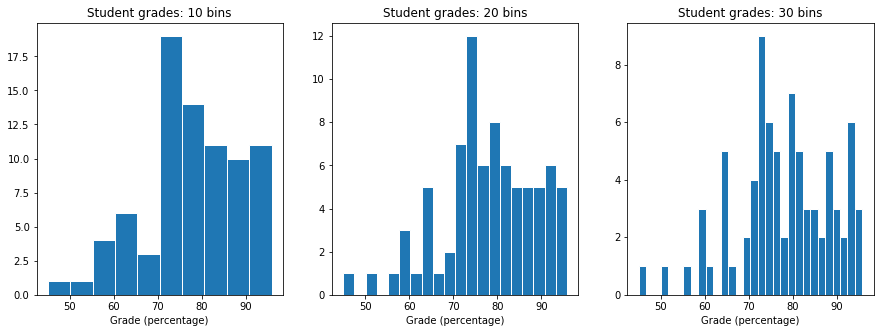

In [10]:
# We want our histograms in separate axes:
pyplot.figure(figsize=(15, 5))  # (width, height) = (15, 5)

# Create 3 subplots, side-by-side
pyplot.subplot(1, 3, 1)
pyplot.hist(data['Grade'], bins=10, edgecolor='white');
pyplot.title('Student grades: 10 bins')
pyplot.xlabel('Grade (percentage)')

pyplot.subplot(1, 3, 2)
pyplot.hist(data['Grade'], bins=20, edgecolor='white');
pyplot.title('Student grades: 20 bins')
pyplot.xlabel('Grade (percentage)')

pyplot.subplot(1, 3, 3)
pyplot.hist(data['Grade'], bins=30, edgecolor='white');
pyplot.title('Student grades: 30 bins')
pyplot.xlabel('Grade (percentage)');

Some things to note:

* The `subplot` command with 1 row and 3 columns is used to visualize the differences side-by-side. Our eyes are very good at picking out differences this way. When you want to communicate differences and contrasts, this is an effective way to do so.
* Compare the 1st plot here (with the white edges) to the one further up the page. The white edges help highlight the bins and improve readability. It also emphasizes the point just made. It is hard to scroll up-and-down the page to make comparisons.
* As you add more bins there might be some sub-ranges where there are no data. These lead to the appearance of gaps in the histogram.

<img src="images/general/Crystal_Clear_app_korganizer.png" style="width: 100px ; float:right"/>

* Notice how the shape of the histogram can change quite dramatically: the 10 and 20-bin histogram still look similar, but the one with 30 bins does not. You can use the number of bins to - unjustifiably - alter your message about the distribution of the data. Use it to "tune" your message, but be careful of using an excessive number of bins, leading to a sparse histogram with many gaps.


##### Enrichment
    
Try entering this command below: 
```python
counts, bins, patches = pyplot.hist(data['Grade'], bins=20, edgecolor='white')
```
and inspect the value of ``counts`` and ``bins`` that you get as output. What do you think these are? Compare them to the plots above.

In [ ]:
# Try the above code here, and interpret the output


### Step 6: Communicating your results

We need to wrap up our workflow with the final step of communicating our goal: what does the spread of the data looks like?

We won't provide a definitive answer, rather, we will give some phrases and sentences below that you might use if you had to write this in a report. ***Which of these are correct***, and ***which are incorrect***?

* The grades of the students are uniformly distributed (spread).
* The time taken is approximately symmetrically spread, with a center of 190 minutes.
* There is long tail observed in the student grades, with a <a href="https://www.itl.nist.gov/div898/handbook/eda/section3/histogr6.htm" target="_blank">tail (skew) to the right</a>.
* There is long tail observed in the student grades, with a <a href="https://www.itl.nist.gov/div898/handbook/eda/section3/histogr7.htm" target="_blank">tail (skew) to the left</a>
* There appear to be outliers in the `Time` taken variable, with some students taking an exceptionally short time.
* The median grade seems to be between 70 and 75%, and matches the value in the ``describe()`` table.

### Summary

You should, from the above exercise see the value of a histogram. New terminology is ***highlighted***.

<img src="images/general/Crystal_Clear_app_korganizer.png" style="width: 100px ; float:right"/>

* Histograms are a graphic summary of the spread of a single variable. We sometimes use the word "***distribution***" instead of "spread". The word ***scale*** is also used by statisticians as well for this concept.
* We get a good idea of the center of the data. Also called the ***location***.
* We can, depending on the number of bins, detect if there are outliers.
* It indicates if there is skew in the data; does the histogram have a tail to one side?
* We also see how many 'humps' there are in the data. Is everything collected in one hump, or are there two humps (peaks). This <a href="https://www.itl.nist.gov/div898/handbook/eda/section3/eda33e4.htm" target="_blank">webpage</a> shows an example of distribution with two peaks.

#### ➜ Challenge yourself: Random walks

Imagine a person walking. Every step forward also includes a small random amount to the left (negative values) or right (positive values).

We can model these values with numbers from a normal distribution, which is centered at zero. If they were walking perfectly straight ahead, then viewed from the back, their position stays at zero if they walk in such a straight line.

If they have had too much to drink, their steps might be biased a bit more. We can increase the standard deviation of the normal distribution to make the distribution wider.

In [11]:
from scipy.stats import norm

# 20 steps for a regular personn, showing the deviation to the 
# left (negative) or to the right (positive) when they are 
# walking straight. Values are in centimeters.
regular_steps = norm.rvs(loc=0, scale=5, size = 20)
print('Regular walking: \n{}'.format(regular_steps))

# Consumed too much? Standard deviation (scale) is larger:
deviating_steps = norm.rvs(loc=0, scale=12, size = 20)
print('Someone who has consumed too much: \n{}'.format(deviating_steps))

Regular walking: 
[-0.85526303  1.94293716 -1.2108169  -0.11485683  2.06194554 -0.92115883
  1.99867291 -9.23186728  0.94882896 -2.4155263   2.45856643 -4.97977118
  3.99721759 -0.31779249  2.42777184 -7.28715019  4.54681949  1.27976685
  0.9463751  -1.29381538]
Someone who has consumed too much: 
[-9.52760571e+00  2.13418424e+00  2.97119311e+00  8.38051160e+00
 -5.21841490e+00 -3.51192102e+00 -1.17484857e+01  1.83258335e-02
  3.84816435e-01  7.29223118e+00 -4.63506962e+00  1.28184989e+01
 -1.97047613e+00  3.45214953e+00 -2.28036131e+00  4.96446718e+00
 -2.81905460e+01 -7.36290331e+00 -5.66052118e+00 -1.84086063e+01]


##### Questions

1. Visualize the histogram of 1000 steps of someone who is walking *normally* 😃 
2. Visualize, in a subplot, side-by-side, the histogram of someone who has consumed too much.
3. Looking ahead: in the next module we will show what this random walk looks like in a time-series plot.

Both histograms should be centered at zero. Give each histogram a title, and a label on the x-axis, including units of centimeters.

***Hint*** To create a Pandas series of the values, remember [from worksheet 7](https://yint.org/pybasic07) that you can do that as follows:
```python
import pandas as pd
steps = pd.Series(data = ...)
```

In [ ]:
# Put your code here

A person walking in random way has a cumulative effect. If they have deviated 30cm to the left, therefore they are at `-30`, and their next step is to sway to the right by 10cm, then they will be at `-20`. 

Modify your code to show the histogram of the cumulative sum of the deviations! You only need to make a very small modification to do this - thank you Pandas!

#### ➜ Challenge yourself: Understanding the normal distribution

Use these function from Pandas (we introduced them in [worksheet 7](https://yint.org/pybasic07))


In general, the same things you can calculate in NumPy, you can repeat in Pandas:

<table class="my">
  <tr>
    <th>NumPy</th>
    <th>Pandas</th>
    <th>Description</th>
  </tr>
  <tr >
    <td><code>np.mean</code></td>
    <td><code>df.mean</code></td>
    <td>Arithmetic average</td>
  </tr>
  <tr >
    <td><code>np.median</code></td>
    <td><code>df.median</code></td>
    <td>Median value</td>
  </tr>     
  <tr >
    <td><code>np.std</code></td>
    <td><code>df.std</code></td>
    <td>Standard deviation</td>
  </tr>  
  <tr >
    <td><code>-</code></td>
    <td><code>df.mad</code></td>
    <td>Mean absolute deviation</td>
  </tr>  
  <tr >
    <td><code>np.var</code></td>
    <td><code>df.var</code></td>
    <td>Variance</td>
  </tr>  
  <tr >
    <td><code>np.min</code></td>
    <td><code>df.min</code></td>
    <td>Minimum value</td>
  </tr>  
  <tr >
    <td><code>np.max</code></td>
    <td><code>df.max</code></td>
    <td>Maximum value</td>
  </tr> 
</table>


Create a sample of $n=10000$ values from the normal distribution. 
```python
from scipy.stats import norm
import pandas as pd
n = 10000
normal_values = pd.Series(norm.rvs(loc=7.5, scale=1.0, size = n))
```

1. What is the mean of the above values? Run the code several times, since everytime you will get a different sample of values.
2. Does the standard deviation match with the ``scale`` input provided?
3. What is the median value?
4. Use the `.describe()` function and see what the 25th percentile is. Calculate this value yourself. In Pandas the function to do so is called `quantile(q=0.25)`.
5. Repeat this for the 75th percentile. Therefore, between which two values do 50% of the data from a normal distribution lie?

In [12]:
from scipy.stats import norm
import pandas as pd

n = 10000
normal_values = pd.Series(norm.rvs(loc=0, scale=1, size = n))
normal_values.describe()

count    10000.000000
mean        -0.010293
std          0.999821
min         -4.109381
25%         -0.683082
50%         -0.011365
75%          0.661128
max          4.232757
dtype: float64

#### ➜  Challenge yourself:  Can you see normal distributions using a histogram?

Many statistical tools require the data to be normally distributed. 

Novices fall in the trap of plotting the histogram, and saying that it looks to be normally distributed, and then keep going with their next steps. There is a better way to test this,which is shown in [the next module](https://yint.org/pybasic10).

But for now, try to run this code, to convince yourself that histograms are not a great tool to visualize if data are normally distributed. 

***Run the code several times***. Sometimes the normal distribution does not look bell-curve shaped, and the others do; but also the other way around.

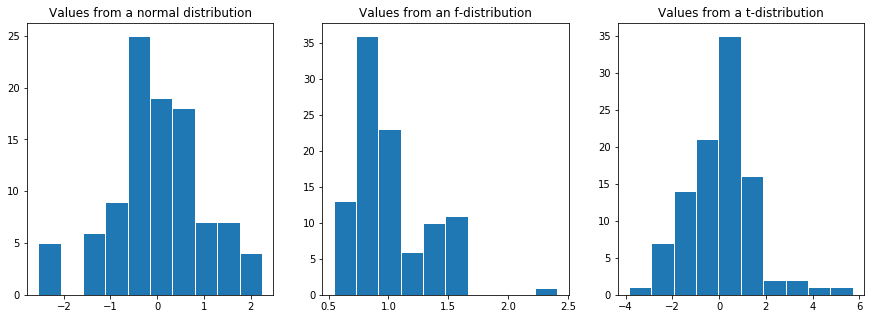

In [14]:
from scipy.stats import f, norm, t
import pandas as pd
from matplotlib import pyplot
%matplotlib inline

N = 100
bins = 10

true_normal = norm.rvs(size=N)
f_distributed = f.rvs(dfn=50, dfd=30,  size=N)
t_distributed = t.rvs(df=5, size=N)

norm_values = pd.Series(data=true_normal)
f_values = pd.Series(data=f_distributed)
t_values = pd.Series(data=t_distributed)

# Plotting
# We want our histograms in separate axes:
pyplot.figure(figsize=(15, 5))  # (width, height) = (15, 5)

# Create 3 subplots, side-by-side
pyplot.subplot(1, 3, 1)
pyplot.hist(norm_values, bins=bins, edgecolor='white');
pyplot.title('Values from a normal distribution')

pyplot.subplot(1, 3, 2)
pyplot.hist(f_values, bins=bins, edgecolor='white');
pyplot.title('Values from an f-distribution')

pyplot.subplot(1, 3, 3)
pyplot.hist(t_values, bins=bins, edgecolor='white');
pyplot.title('Values from a t-distribution');


#### ➜ Challenge yourself: Dice averages are normally distributed

A common concept in a first statistics course is to talk about the central limit theorem. As you take averages of more and more independent data values, the average becomes normally distributed, even if the original values are n

We know from the above challenge we should not judge normality by plots, but here we will show how the data ***appear*** to be become more normal. We are not testing, or saying, they are normal.

<img src="images/general/Crystal_Clear_app_korganizer.png" style="width: 100px ; float:right"/>

If you throw a dice, each throw is ***independent*** of the next one: the value you throw now does not depend on the value before, and it cannot influence the value after. This is another important statistical concept, but it is

Each throw of the dice comes from the [***uniform*** distribution](https://learnche.org/pid/univariate-review/uniform-distribution). Each value of 1, 2, 3, 4, 5 or 6 has a uniform (or equal) chance of appearing.
```python
import numpy as np

# Throw a dice 100 times. Values are between 1 (inclusive) and 7 (exclusive)
np.random.randint(1, 7, size=100)
```


In [ ]:
CODE HERE TO SHOW AVERAGE OF 1, 2, 4, 6, 8, 10 throws

>***Feedback and comments about this worksheet?***
> Please provide any anonymous [comments, feedback and tips](https://docs.google.com/forms/d/1Fpo0q7uGLcM6xcLRyp4qw1mZ0_igSUEnJV6ZGbpG4C4/edit).

In [1]:
# IGNORE this. Execute this cell to load the notebook's style sheet.
from IPython.core.display import HTML
css_file = './images/style.css'
HTML(open(css_file, "r").read())